In [1]:
using Pkg; Pkg.activate("..")

using JLD2, OffsetArrays, LinearAlgebra, OceanTurb, PyPlot, Printf, Statistics,
        Dao, ColumnModelOptimizationProject, ColumnModelOptimizationProject.KPPOptimization,
        OceanTurb.Plotting

In [2]:
filename = "perfect_model_batch_markov_N075.jld2"
@load filename chain

1-element Array{Symbol,1}:
 :chain

In [3]:
p = BasicParameters(
    (map(x->getproperty(x.param, p), chain.links) for p in paramnames(chain))...)

@show paramnames(chain)

paramnames(chain) = (:CRi, :CKE, :CNL, :Cτ, :Cstab, :Cunst, :Cb_U, :Cb_T, :Cd_U, :Cd_T)


(:CRi, :CKE, :CNL, :Cτ, :Cstab, :Cunst, :Cb_U, :Cb_T, :Cd_U, :Cd_T)

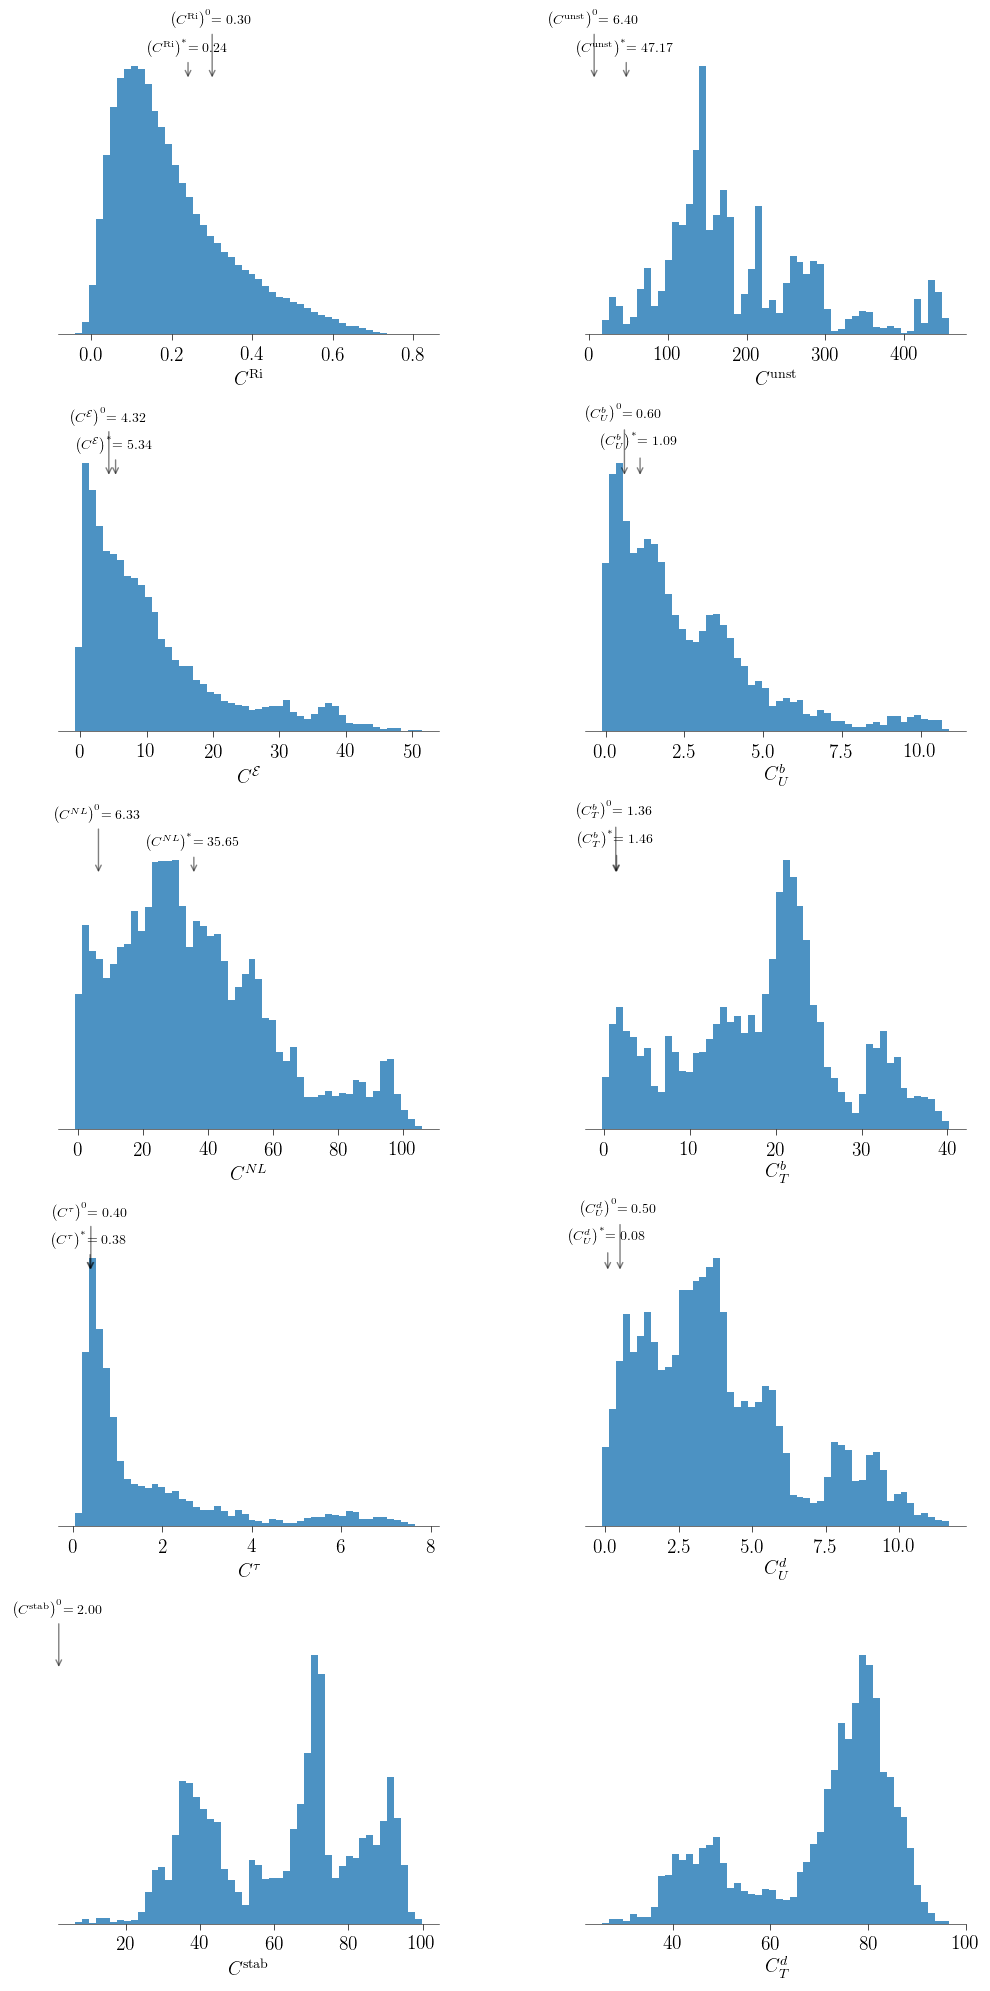

In [4]:
burned(a) = view(a, 40000:length(a))

arrowprops = Dict(:arrowstyle=>"->", :alpha=>0.5) #, :facecolor=>"black", :width=>0.01, :headwidth=>5, :frac=>0.01, :alpha=>0.5)

param★ = optimal(chain).param
param₀ = chain[1].param

bins=50

fig, axs = subplots(nrows=Int(length(p)/2), ncols=2, figsize=(10, 20))

for (i, ax) in enumerate(axs)
    sca(ax)
    hist(burned(p[i]), bins=bins, density=true, alpha=0.8)
    
    pstr = KPPOptimization.latexparams[paramnames(chain)[i]]
    
    bottom, top = ylim()
    
    #ax.axvline(x=param★[i], color="k", linestyle="-", alpha=0.5)
    
    optilabel = L"\big (" * pstr * L"\big )^*" * @sprintf("\$ = %.2f \$", param★[i])
    initlabel = L"\big (" * pstr * L"\big )^0" * @sprintf("\$ = %.2f \$", param₀[i])

    ax.annotate(optilabel, xy=(param★[i], 0.9*top), xytext=(param★[i], top),
                    horizontalalignment="center",
                    arrowprops=arrowprops)
    
    ax.annotate(initlabel, xy=(param₀[i], 0.9*top), xytext=(param₀[i], 1.1*top),
                    horizontalalignment="center",
                    arrowprops=arrowprops)
    
    bottomspine()
    xlabel(pstr)
end

tight_layout()